In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import warnings
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import label_binarize

In [2]:
df = pd.read_csv("THESSALONIKI.csv")

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df

,Gender,Age,Driver_Licence,H_size,Veh_count,Income,Mode,Minutes,Go_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Car_freq,Pt_freq,Walk_freq,Distance
0,Άνδρας,21 - 30,No,4,3.0,500 - 1000,Λεωφορείο,60,09.00 - 12.00,Totally disagree,Neutral,Disagree,Agree,Totally agree,Neutral,Agree,Καθόλου,Αρκετές φορές (4-5 μέρες την εβδομάδα),Καθημερινά,7.12
1,Άνδρας,21 - 30,No,3,1.0,500 - 1000,Λεωφορείο,40,06.00 - 09.00,Agree,Agree,Agree,Disagree,Disagree,Disagree,Neutral,Καθόλου,Καθημερινά,Λίγες φορές (2-3 μέρες την εβδομάδα),7.60
2,Γυναίκα,21 - 30,No,3,1.0,0 - 500,Λεωφορείο,35,06.00 - 09.00,Agree,Totally agree,Neutral,Disagree,Totally disagree,Agree,Disagree,Καθόλου,Καθημερινά,Αρκετές φορές (4-5 μέρες την εβδομάδα),6.60
3,Άνδρας,21 - 30,Yes,3,2.0,500 - 1000,Αμάξι,40,06.00 - 09.00,Totally agree,Totally agree,Totally agree,Disagree,Neutral,Totally agree,Totally agree,Αρκετές φορές (4-5 μέρες την εβδομάδα),Καθόλου,Λίγες φορές (2-3 μέρες την εβδομάδα),19.60
4,Γυναίκα,21 - 30,No,4,1.0,500 - 1000,Πόδια,5,09.00 - 12.00,Totally agree,Totally agree,Totally agree,Totally agree,Agree,Totally agree,Totally disagree,Καθόλου,Σπάνια (1 μέρα την εβδομάδα),Καθημερινά,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Άνδρας,21 - 30,Yes,4,1.0,500 - 1000,Λεωφορείο,25,12.00 - 15.00,Disagree,Totally agree,Agree,Totally disagree,Neutral,Agree,Totally agree,Σπάνια (1 μέρα την εβδομάδα),Καθημερινά,Αρκετές φορές (4-5 μέρες την εβδομάδα),3.60
212,Γυναίκα,21 - 30,No,8,2.0,1000 - 1500,Πόδια,23,12.00 - 15.00,Totally agree,Totally agree,Neutral,Agree,Disagree,Totally agree,Totally agree,Καθόλου,Καθόλου,Καθημερινά,1.50
213,Γυναίκα,21 - 30,Yes,6,2.0,500 - 1000,Αμάξι,33,12.00 - 15.00,Totally agree,Totally agree,Neutral,Totally disagree,Totally disagree,Totally agree,Totally agree,Καθημερινά,Καθημερινά,Αρκετές φορές (4-5 μέρες την εβδομάδα),25.40
214,Άνδρας,21 - 30,Yes,7,3.0,500 - 1000,Πόδια,24,12.00 - 15.00,Agree,Totally disagree,Agree,Totally agree,Totally agree,Disagree,Totally disagree,Λίγες φορές (2-3 μέρες την εβδομάδα),Αρκετές φορές (4-5 μέρες την εβδομάδα),Καθημερινά,2.00


In [5]:
print(df.columns)

Index(['Gender', 'Age', 'Driver_Licence', 'H_size', 'Veh_count', 'Income',
       'Mode', 'Minutes', 'Go_time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Car_freq', 'Pt_freq',
       'Walk_freq', 'Distance'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          216 non-null    object 
 1   Age             216 non-null    object 
 2   Driver_Licence  216 non-null    object 
 3   H_size          216 non-null    int64  
 4   Veh_count       216 non-null    float64
 5   Income          216 non-null    object 
 6   Mode            216 non-null    object 
 7   Minutes         216 non-null    int64  
 8   Go_time         216 non-null    object 
 9   Convenience     216 non-null    object 
 10  Cost            216 non-null    object 
 11  Safety          216 non-null    object 
 12  Environment     216 non-null    object 
 13  Health          216 non-null    object 
 14  Weather         216 non-null    object 
 15  Parking         216 non-null    object 
 16  Car_freq        216 non-null    object 
 17  Pt_freq         216 non-null    obj

In [7]:
df.isnull().any()

Gender            False
Age               False
Driver_Licence    False
H_size            False
Veh_count         False
Income            False
Mode              False
Minutes           False
Go_time           False
Convenience       False
Cost              False
Safety            False
Environment       False
Health            False
Weather           False
Parking           False
Car_freq          False
Pt_freq           False
Walk_freq         False
Distance          False
dtype: bool

In [8]:
df.duplicated().sum()

0

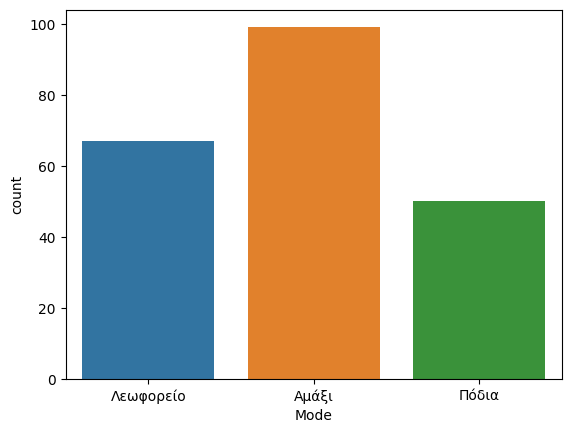

In [9]:
sns.countplot(x='Mode', data=df)
plt.show()

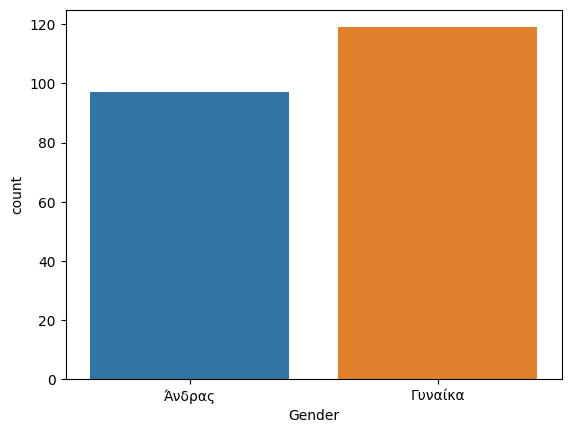

In [10]:
sns.countplot(x='Gender', data=df)
plt.show()

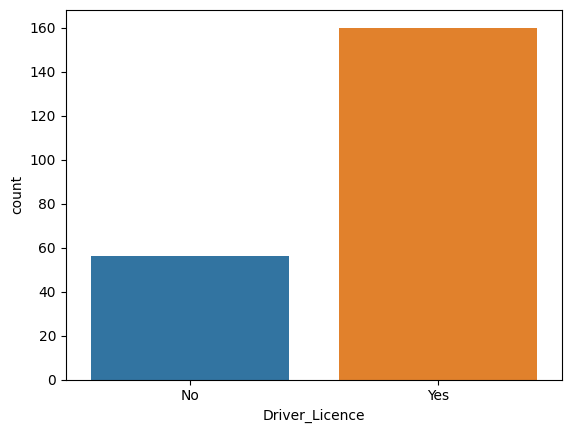

In [11]:
sns.countplot(x='Driver_Licence', data=df)
plt.show()

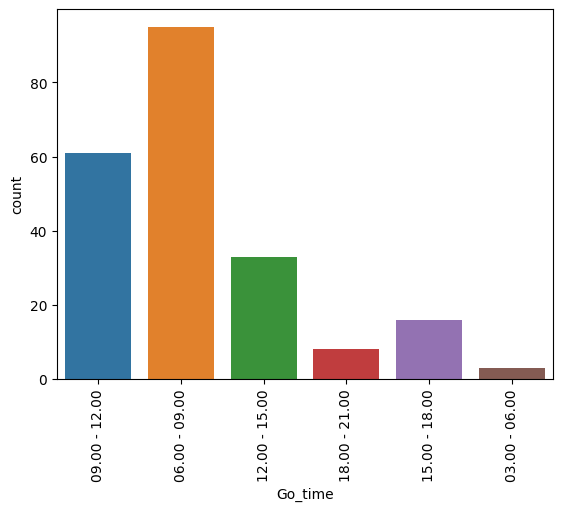

In [12]:
sns.countplot(x='Go_time', data=df)
plt.xticks(rotation=90)
plt.show()

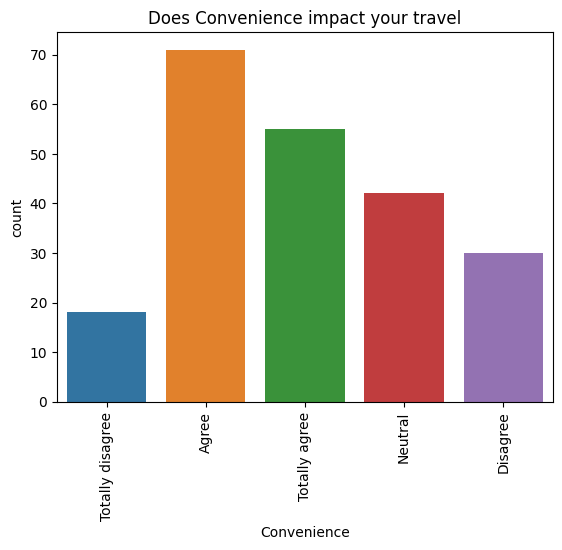

In [13]:
sns.countplot(x='Convenience', data=df)
plt.title('Does Convenience impact your travel')
plt.xticks(rotation=90)
plt.show()

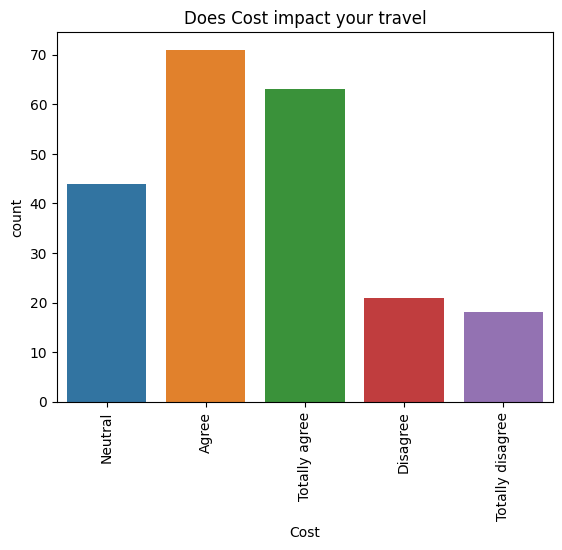

In [16]:
sns.countplot(x='Cost', data=df)
plt.title('Does Cost impact your travel')
plt.xticks(rotation=90)
plt.show()

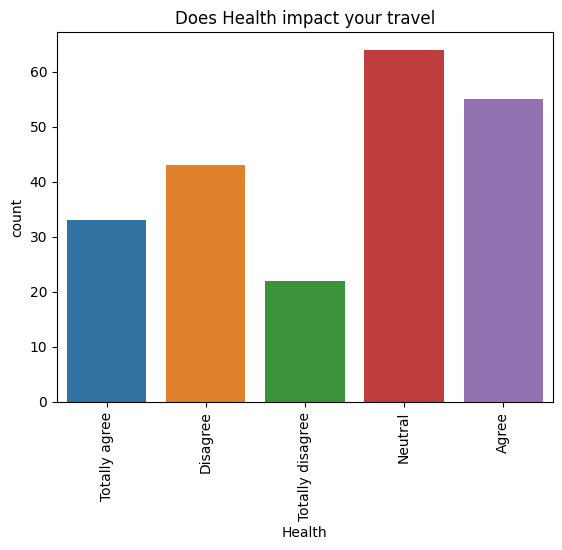

In [17]:
sns.countplot(x='Health', data=df)
plt.title('Does Health impact your travel')
plt.xticks(rotation=90)
plt.show()

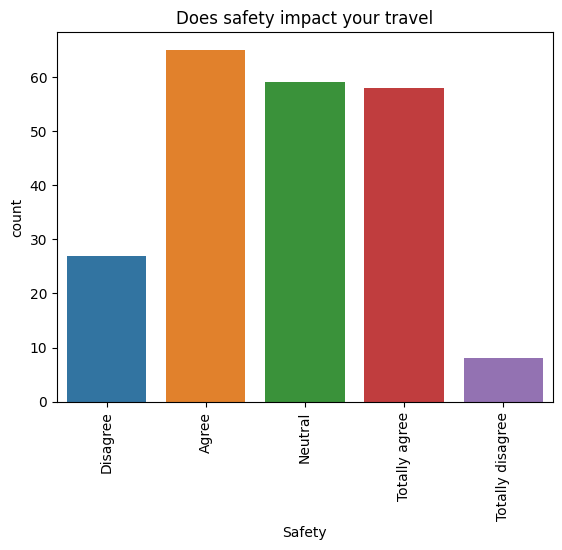

In [18]:
sns.countplot(x='Safety', data=df)
plt.title('Does safety impact your travel')
plt.xticks(rotation=90)
plt.show()

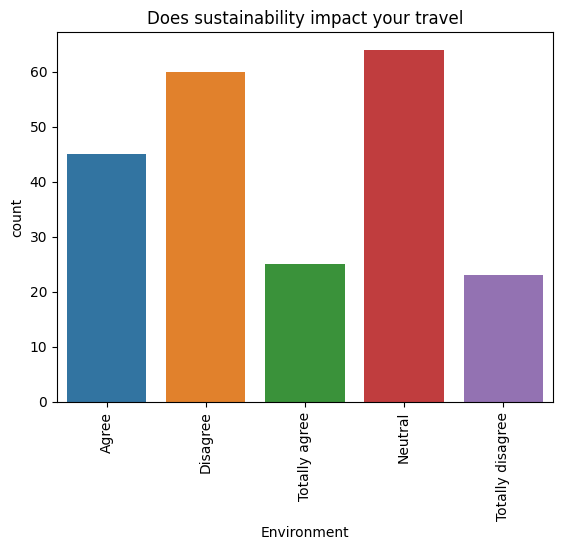

In [19]:
sns.countplot(x='Environment', data=df)
plt.title('Does sustainability impact your travel')
plt.xticks(rotation=90)
plt.show()

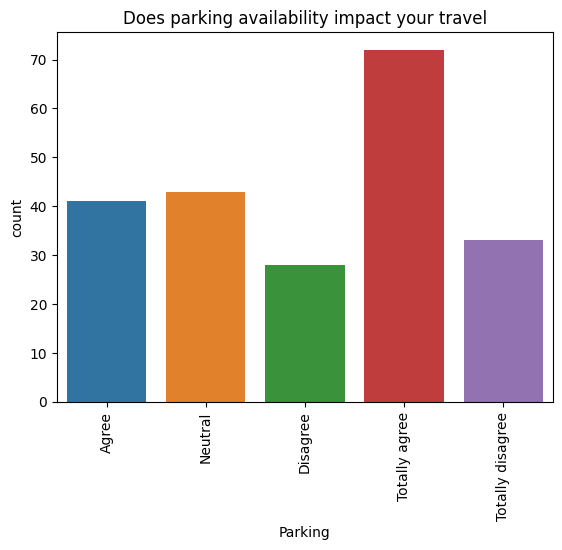

In [20]:
sns.countplot(x='Parking', data=df)
plt.title('Does parking availability impact your travel')
plt.xticks(rotation=90)
plt.show()

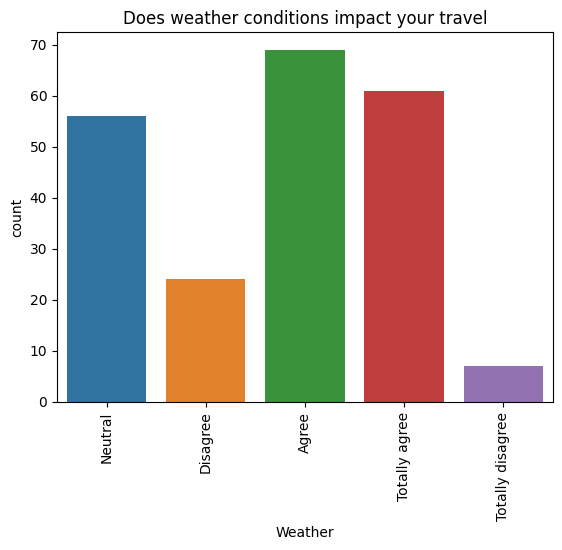

In [21]:
sns.countplot(x='Weather', data=df)
plt.title('Does weather conditions impact your travel')
plt.xticks(rotation=90)
plt.show()

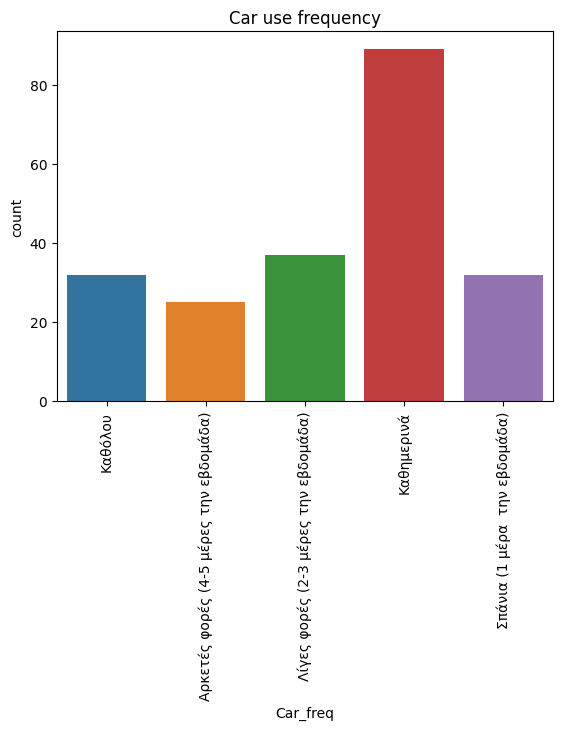

In [40]:
sns.countplot(x='Car_freq', data=df)
plt.title('Car use frequency')
plt.xticks(rotation=90)
plt.show()

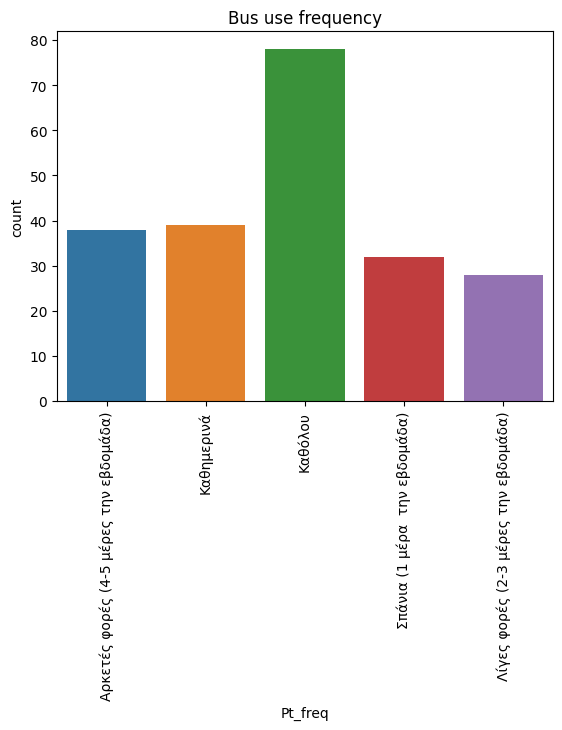

In [41]:
sns.countplot(x='Pt_freq', data=df)
plt.title('Bus use frequency')
plt.xticks(rotation=90)
plt.show()

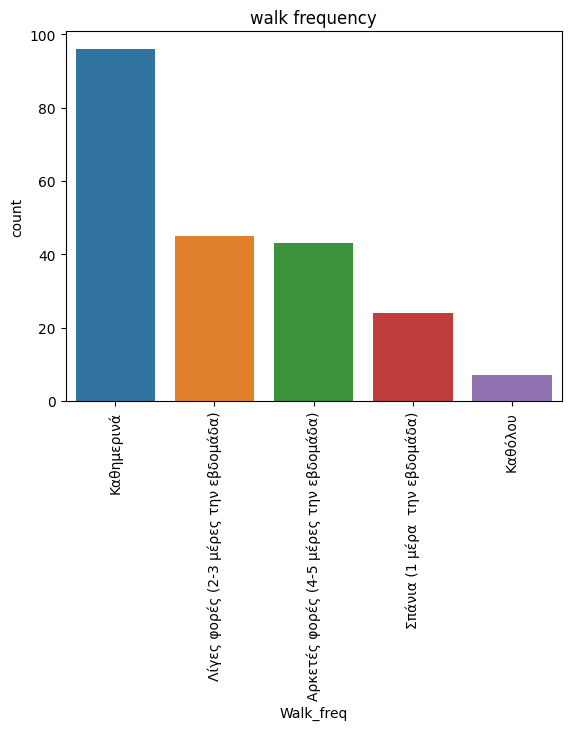

In [42]:
sns.countplot(x='Walk_freq', data=df)
plt.title('walk frequency')
plt.xticks(rotation=90)
plt.show()

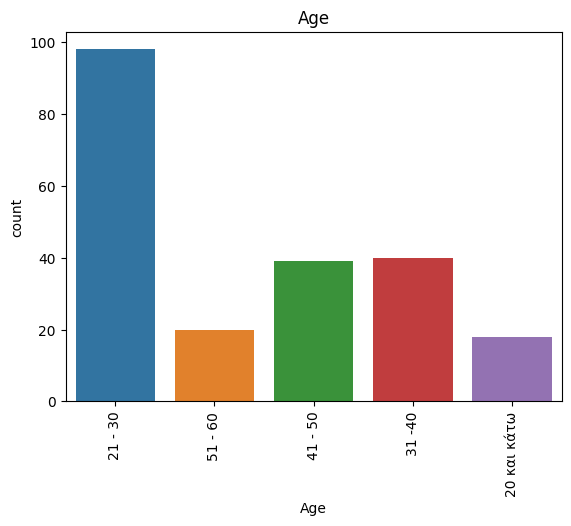

In [43]:
sns.countplot(x='Age', data=df)
plt.title('Age')
plt.xticks(rotation=90)
plt.show()

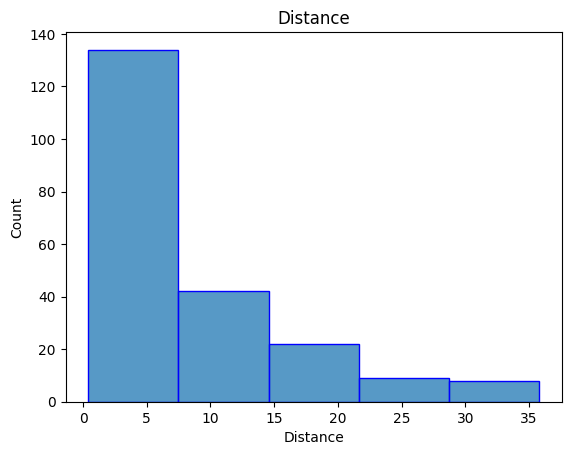

In [54]:
sns.histplot(df['Distance'], bins=5, edgecolor='blue')
plt.ylabel('Count')
plt.title('Distance')
plt.show()

In [9]:
df = df[(df['Distance'] <= 80)]

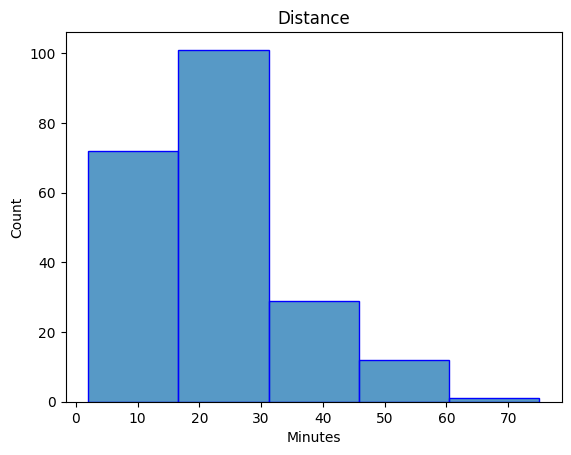

In [8]:
sns.histplot(df['Minutes'], bins=5, edgecolor='blue')
plt.ylabel('Count')
plt.title('Distance')
plt.show()

In [16]:
df.describe()

,H_size,Veh_count,Minutes,Distance
count,215.000000,215.000000,215.000000,215.000000
mean,3.753488,1.661860,23.376744,8.075907
std,1.453219,0.935557,13.014457,7.875210
min,1.000000,0.000000,2.000000,0.400000
25%,3.000000,1.000000,14.500000,2.250000
50%,4.000000,2.000000,22.000000,5.300000
75%,4.000000,2.000000,30.000000,11.650000
max,9.000000,7.000000,75.000000,35.800000


# PREPROCESS

In [10]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Convenience'] = df['Convenience'].replace(value_mapping)

In [11]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Cost'] = df['Cost'].replace(value_mapping)

In [12]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Safety'] = df['Safety'].replace(value_mapping)

In [13]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Health'] = df['Health'].replace(value_mapping)

In [14]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Weather'] = df['Weather'].replace(value_mapping)

In [15]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Environment'] = df['Environment'].replace(value_mapping)

In [16]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Parking'] = df['Parking'].replace(value_mapping)

In [17]:
value_mapping = {"Καθόλου":1, "Σπάνια (1 μέρα  την εβδομάδα)":2, "Λίγες φορές (2-3 μέρες την εβδομάδα)":3, "Αρκετές φορές (4-5 μέρες την εβδομάδα)":4, "Καθημερινά":5}
df["Car_freq"] = df["Car_freq"].replace(value_mapping)

In [18]:
value_mapping = {"Καθόλου":1, "Σπάνια (1 μέρα  την εβδομάδα)":2, "Λίγες φορές (2-3 μέρες την εβδομάδα)":3, "Αρκετές φορές (4-5 μέρες την εβδομάδα)":4, "Καθημερινά":5}
df["Pt_freq"] = df["Pt_freq"].replace(value_mapping)

In [19]:
value_mapping = {"Καθόλου":1, "Σπάνια (1 μέρα  την εβδομάδα)":2, "Λίγες φορές (2-3 μέρες την εβδομάδα)":3, "Αρκετές φορές (4-5 μέρες την εβδομάδα)":4, "Καθημερινά":5}
df["Walk_freq"] = df["Walk_freq"].replace(value_mapping)

In [20]:
value_mapping = {"Αμάξι":1, "Λεωφορείο":2, "Πόδια":3}
df['Mode'] = df['Mode'].replace(value_mapping)

In [21]:
le=LabelEncoder()
features=["Gender","Age","Income","Go_time", "Driver_Licence"]
for col in features:
    df[col]=le.fit_transform(df[col])

In [22]:
df

,Gender,Age,Driver_Licence,H_size,Veh_count,Income,Mode,Minutes,Go_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Car_freq,Pt_freq,Walk_freq,Distance
0,0,1,0,4,3.0,4,2,60,2,1,3,2,4,5,3,4,1,4,5,7.12
1,0,1,0,3,1.0,4,2,40,1,4,4,4,2,2,2,3,1,5,3,7.60
2,1,1,0,3,1.0,0,2,35,1,4,5,3,2,1,4,2,1,5,4,6.60
3,0,1,1,3,2.0,4,1,40,1,5,5,5,2,3,5,5,4,1,3,19.60
4,1,1,0,4,1.0,4,3,5,2,5,5,5,5,4,5,1,1,2,5,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,1,1,4,1.0,4,2,25,3,2,5,4,1,3,4,5,2,5,4,3.60
212,1,1,0,8,2.0,1,3,23,3,5,5,3,4,2,5,5,1,1,5,1.50
213,1,1,1,6,2.0,4,1,33,3,5,5,3,1,1,5,5,5,5,4,25.40
214,0,1,1,7,3.0,4,3,24,3,4,1,4,5,5,2,1,3,4,5,2.00


<Axes: >

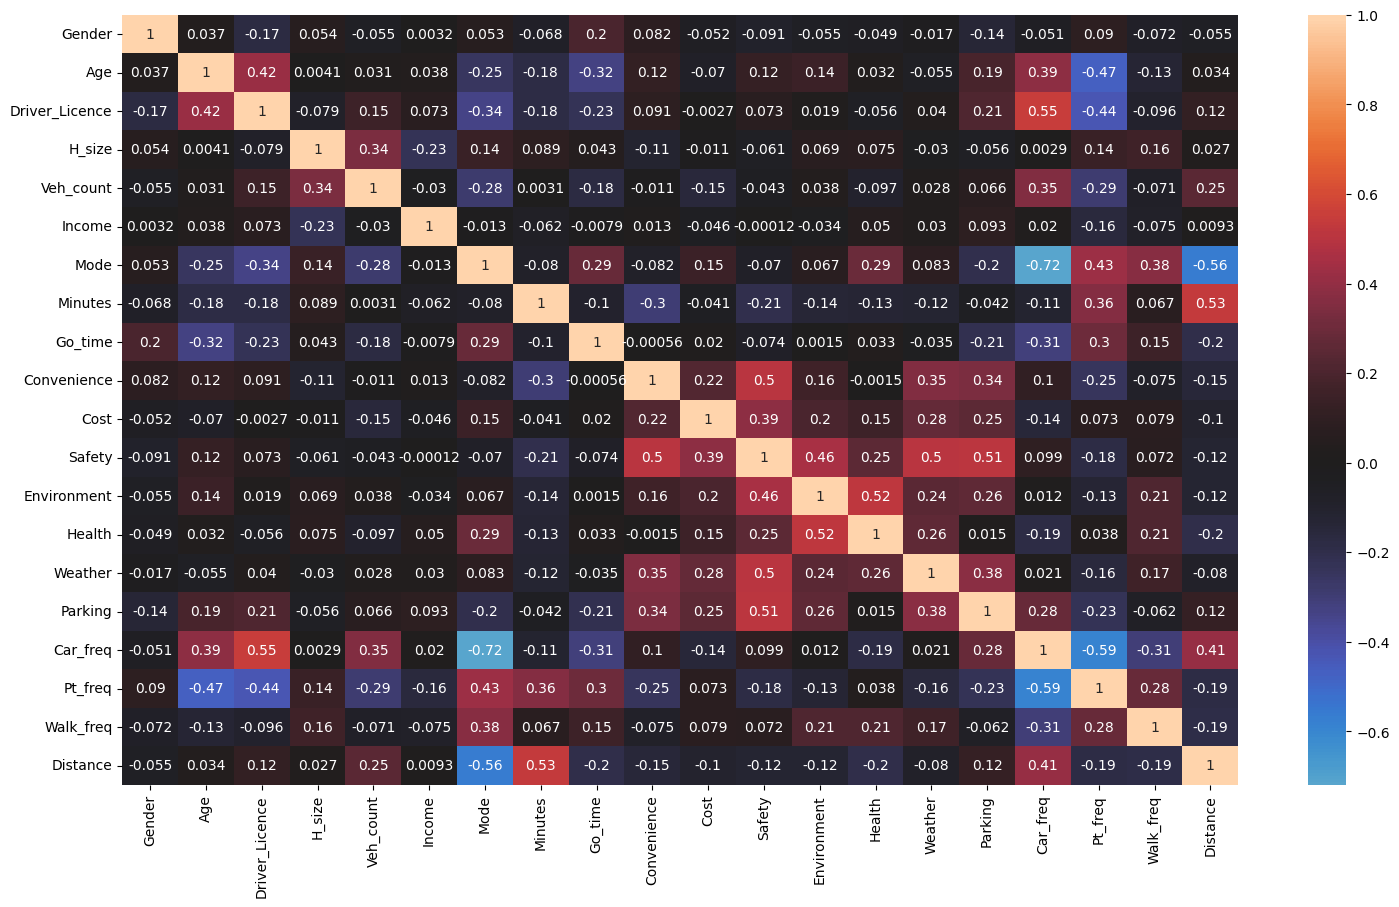

In [26]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [23]:
df_with_constant = add_constant(df)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

          Variable     VIF
0            const 116.934
1           Gender   1.182
2              Age   1.708
3   Driver_Licence   1.706
4           H_size   1.416
5        Veh_count   1.509
6           Income   1.123
7             Mode   3.028
8          Minutes   2.246
9          Go_time   1.339
10     Convenience   1.593
11            Cost   1.304
12          Safety   2.313
13     Environment   1.804
14          Health   1.664
15         Weather   1.661
16         Parking   1.722
17        Car_freq   3.420
18         Pt_freq   2.590
19       Walk_freq   1.354
20        Distance   2.587


In [24]:
X = df[["Convenience","Cost","Safety","Environment","Health","Weather","Parking", "Distance", "Walk_freq", "Pt_freq", "Minutes"]]	
y = df["Mode"]

In [25]:
X

,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance,Walk_freq,Pt_freq,Minutes
0,1,3,2,4,5,3,4,7.120,5,4,60
1,4,4,4,2,2,2,3,7.600,3,5,40
2,4,5,3,2,1,4,2,6.600,4,5,35
3,5,5,5,2,3,5,5,19.600,3,1,40
4,5,5,5,5,4,5,1,0.400,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...
211,2,5,4,1,3,4,5,3.600,4,5,25
212,5,5,3,4,2,5,5,1.500,5,1,23
213,5,5,3,1,1,5,5,25.400,4,5,33
214,4,1,4,5,5,2,1,2.000,5,4,24


In [26]:
X, y = shuffle(X, y, random_state=42)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42, stratify=y)

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Print class counts for y_train
print("Class counts in y_train:")
print(y_train_series.value_counts())

# Print class counts for y_test
print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
1    68
2    47
3    35
Name: count, dtype: int64

Class counts in y_test:
Mode
1    30
2    20
3    15
Name: count, dtype: int64


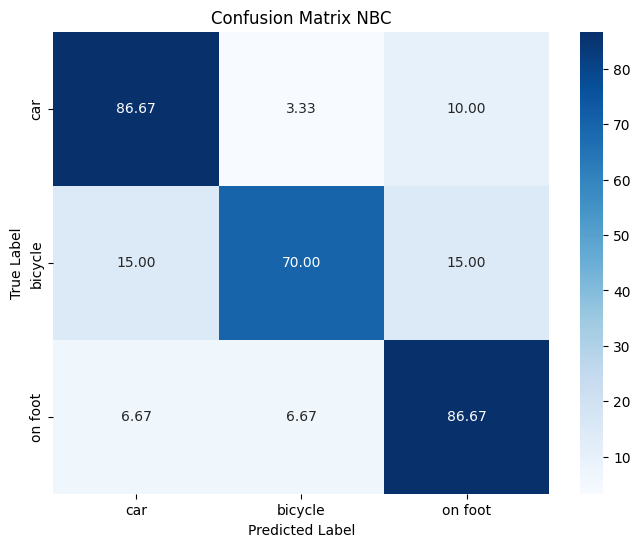

In [30]:
# Create and train a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_classifier.predict(X_test)

# Class labels
class_labels = ["car", "bicycle", "on foot"]

conf_matrix_nbc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_nbc) / conf_matrix_nbc.sum(axis=1)
conf_matrix_percentages_nbc = (conf_matrix_nbc.T / conf_matrix_nbc.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_nbc, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix NBC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [31]:
NBC_Report = classification_report(y_test, y_pred)
print('Tree_Report:', NBC_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           1       0.87      0.87      0.87        30
           2       0.88      0.70      0.78        20
           3       0.68      0.87      0.76        15

    accuracy                           0.82        65
   macro avg       0.81      0.81      0.80        65
weighted avg       0.83      0.82      0.82        65



# Decision Tree

In [32]:
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           1       0.93      0.87      0.90        30
           2       0.89      0.85      0.87        20
           3       0.78      0.93      0.85        15

    accuracy                           0.88        65
   macro avg       0.87      0.88      0.87        65
weighted avg       0.88      0.88      0.88        65



In [34]:
tree_depth = tree.tree_.max_depth
print("Decision Tree Depth:", tree_depth)

Decision Tree Depth: 6


In [37]:
param_grid = {
    'max_depth': list(range(2, 7))
}

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1, param_grid={'max_depth': [2, 3, 4, 5, 6]},
             scoring='accuracy')

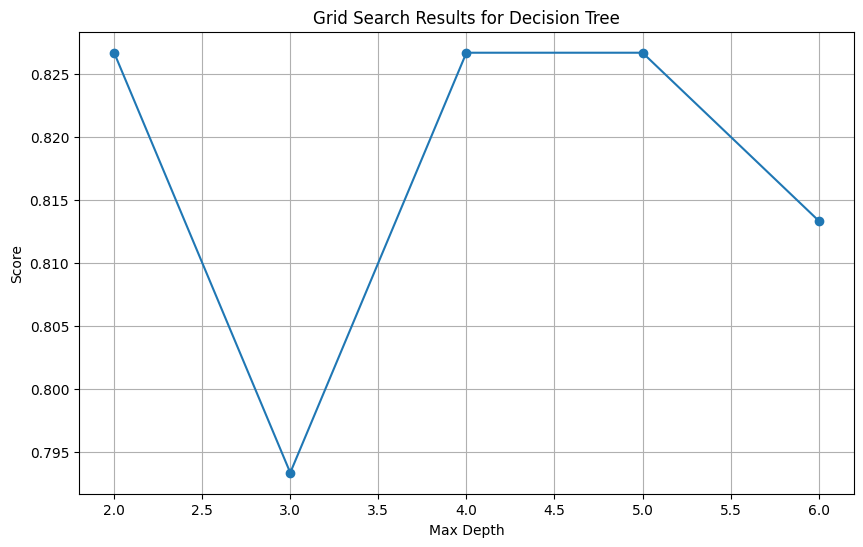

In [38]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [41]:
tree = DecisionTreeClassifier(random_state = 42, max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [42]:
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           1       0.90      0.87      0.88        30
           2       0.86      0.90      0.88        20
           3       0.87      0.87      0.87        15

    accuracy                           0.88        65
   macro avg       0.87      0.88      0.88        65
weighted avg       0.88      0.88      0.88        65



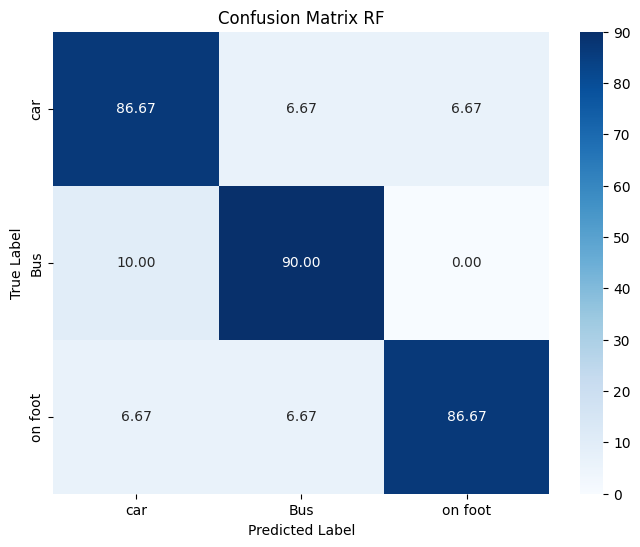

In [43]:
class_labels=["car", "Bus", "on foot"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Random Forest

In [49]:
param_grid = {
    'max_features': range(2, 12)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 4}


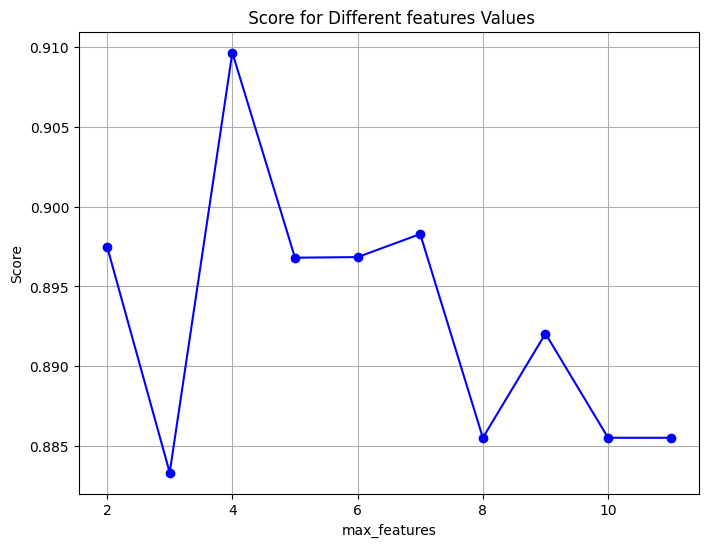

In [50]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [52]:
param_grid = {
    'n_estimators' : range(11, 301)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 21}


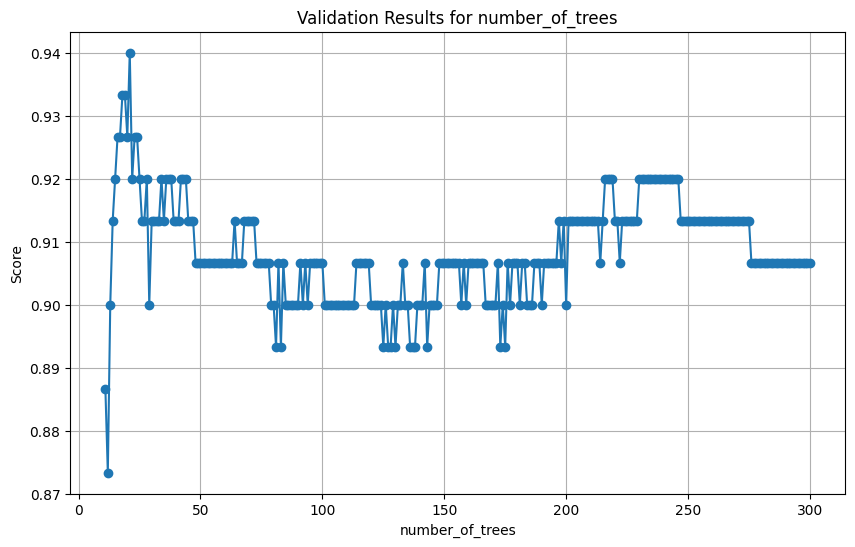

In [53]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [54]:
param_grid = {
    'max_features': range(2, 5),
    'n_estimators' : range(2, 101)}

In [55]:
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 3, 'n_estimators': 21}


In [63]:
rf_model = RandomForestClassifier(random_state=42, max_features=3, n_estimators=21)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
Rf_Report = classification_report(y_test, y_pred)
print('Rf_Report:', Rf_Report, sep='\n')

Rf_Report:
              precision    recall  f1-score   support

           1       0.90      0.93      0.92        30
           2       0.94      0.80      0.86        20
           3       0.82      0.93      0.87        15

    accuracy                           0.89        65
   macro avg       0.89      0.89      0.89        65
weighted avg       0.90      0.89      0.89        65



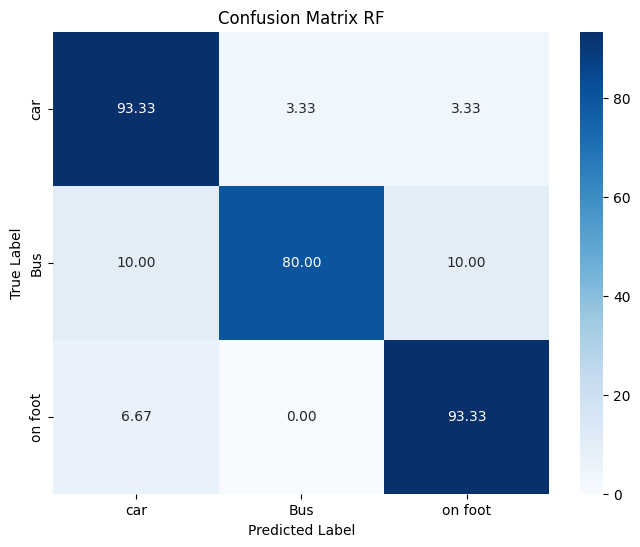

In [64]:
class_labels=["car", "Bus", "on foot"]
conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Logistic Regression

In [35]:
logreg_model = LogisticRegression(random_state=42)

In [36]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1','l2'],
              'solver': ['lbfgs', 'liblinear'],
              'max_iter': [100, 200, 300]}

In [37]:
grid_search_log = GridSearchCV(logreg_model, param_grid, cv=10, scoring='accuracy')

In [38]:
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [39]:
log_params = grid_search_log.best_params_
print(log_params)

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [40]:
logreg_model = LogisticRegression(random_state=42, C=10, max_iter=100, penalty='l1', solver='liblinear')
logreg_model.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [41]:
y_pred_log = logreg_model.predict(X_test)

In [42]:
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           1       0.97      0.93      0.95        30
           2       0.85      0.85      0.85        20
           3       0.75      0.80      0.77        15

    accuracy                           0.88        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.88      0.88      0.88        65



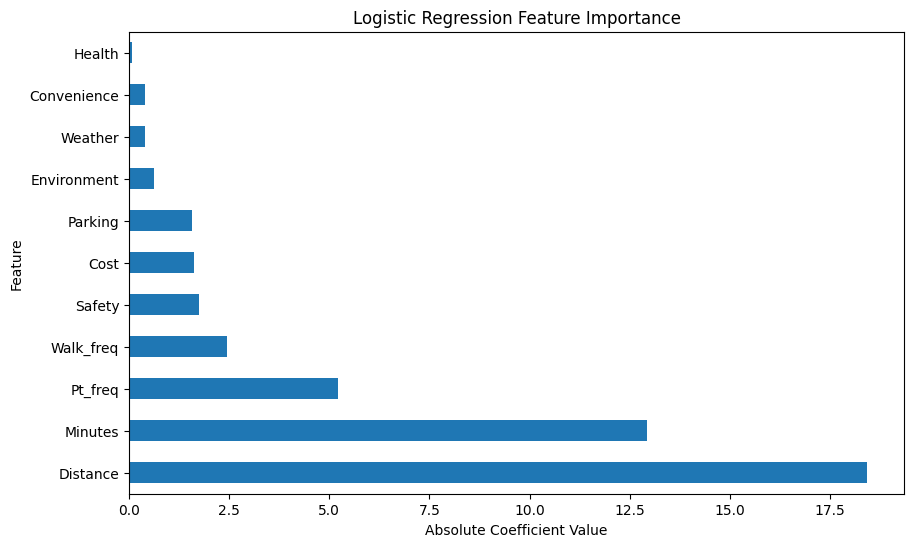

In [43]:
coefficients = pd.Series(logreg_model.coef_[0], index=X.columns)

sorted_coefficients = coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_coefficients.plot(kind='barh')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [44]:
print(sorted_coefficients)

Distance      18.431
Minutes       12.943
Pt_freq        5.220
Walk_freq      2.454
Safety         1.743
Cost           1.610
Parking        1.570
Environment    0.620
Weather        0.406
Convenience    0.390
Health         0.066
dtype: float64


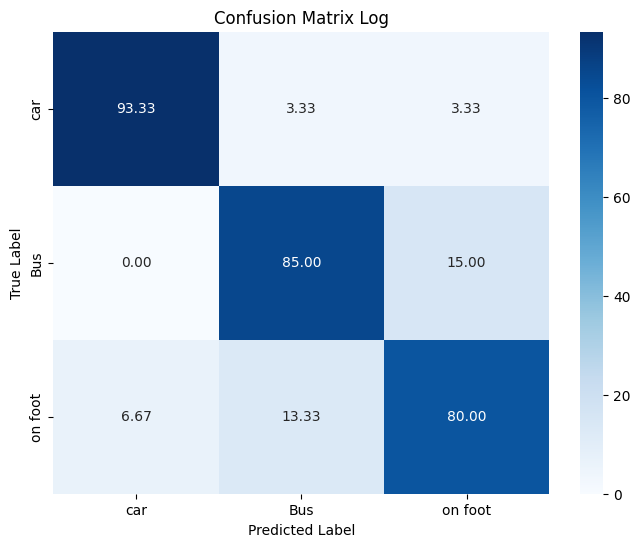

In [45]:
class_labels=["car", "Bus", "on foot"]

conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Log')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()